In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/data/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import math 
import random
from scipy.signal import resample

In [ ]:
train_df = pd.read_csv('/input/heartbeat/mitbih_train.csv',header=None)
test_df = pd.read_csv('/input/heartbeat/mitbih_test.csv',header=None)

In [ ]:
train_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
49854,0.980328,0.865574,0.481967,0.167213,0.121311,0.108197,0.091803,0.055738,0.062295,0.039344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70965,1.000000,0.488608,0.192405,0.121519,0.096203,0.050633,0.043038,0.053165,0.032911,0.025316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15178,1.000000,0.714634,0.163415,0.063415,0.090244,0.014634,0.026829,0.017073,0.017073,0.043902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84738,0.732006,0.655436,0.551302,0.437979,0.301685,0.168453,0.075038,0.024502,0.001531,0.033691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
52627,1.000000,0.640000,0.120000,0.072727,0.116364,0.101818,0.072727,0.047273,0.061818,0.072727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55506,0.887129,0.930693,0.566337,0.336634,0.285149,0.302970,0.265347,0.225743,0.172277,0.128713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28244,0.067961,0.189320,0.300971,0.441748,0.524272,0.485437,0.485437,0.509709,0.519417,0.480583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54425,0.917603,0.921348,0.689139,0.400749,0.086142,0.000000,0.101124,0.187266,0.243446,0.250936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69736,1.000000,0.856734,0.306590,0.000000,0.265043,0.303725,0.312321,0.322350,0.326648,0.328080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29780,0.827051,0.706208,0.369180,0.286031,0.364745,0.342572,0.307095,0.312639,0.312639,0.308204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Classes:['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Classes = {
    0:'N', 
    1:'S', 
    2:'V', 
    3:'F',
    4:'Q'
}

Classes_index = {
    'N': 0, 
    'S': 1, 
    'V': 2, 
    'F': 3, 
    'Q': 4
}

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [ ]:
feat_cols_name = [i for i in range(train_df.shape[1]-1)]

train_df.columns = feat_cols_name+["label"]
test_df.columns = feat_cols_name+["label"]

In [ ]:
train_df["label"] = train_df["label"].astype(int)
test_df["label"] = test_df["label"].astype(int)

In [ ]:
train_df["label"] = train_df["label"].map(Classes)
test_df["label"] = test_df["label"].map(Classes)

In [ ]:
train_df.columns[train_df.isnull().sum() != 0]
test_df.columns[train_df.isnull().sum() != 0]

Index([], dtype='object')

In [ ]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


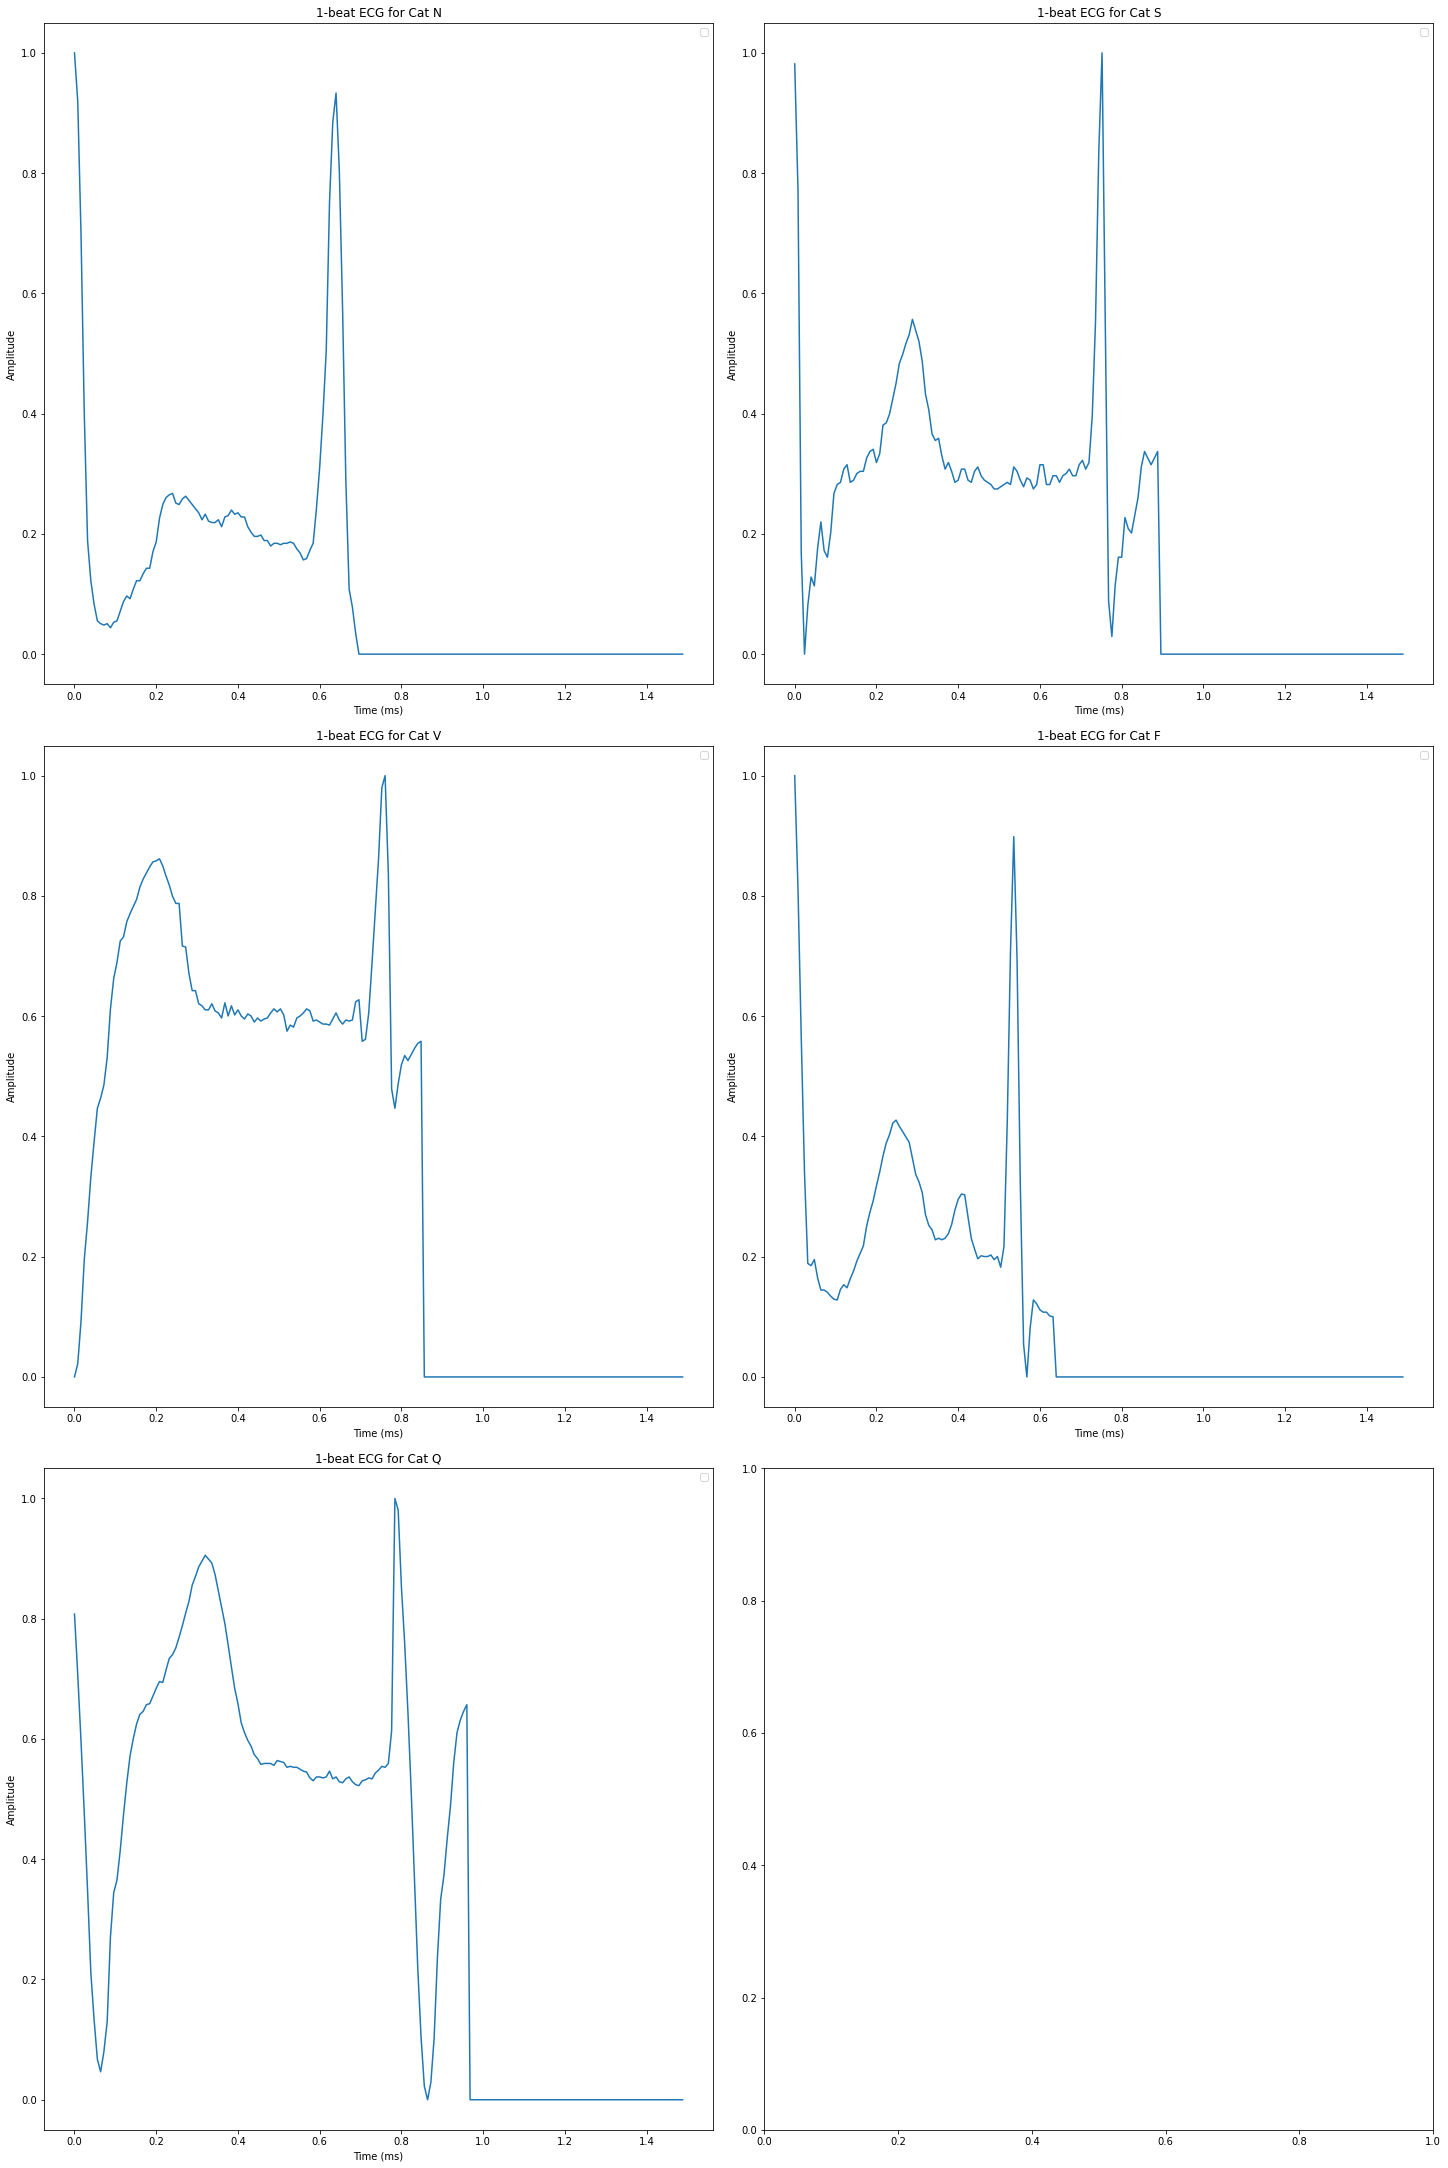

In [ ]:
fig, axes= plt.subplots(math.ceil(len(Classes_index.keys())/2), 2, figsize=(20,30), constrained_layout=True)
X = np.arange(0, len(feat_cols_name))*8/1000

i = 0
for key, value in Classes_index.items():
    ax = axes[int(i/2), i%2]
    ax.plot(X, train_df[train_df["label"] == key][feat_cols_name].sample(1).values.reshape(-1,1))
    ax.legend()
    ax.set(title="1-beat ECG for Cat {}".format(key))
    ax.set(ylabel="Amplitude")
    ax.set(xlabel="Time (ms)")
    i+=1

In [ ]:
def stretch(x):
    l = int(len(feat_cols_name) * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < len(feat_cols_name):
        y_ = np.zeros(shape=(len(feat_cols_name), ))
        y_[:l] = y
    else:
        y_ = y[:len(feat_cols_name)]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def gaussian_noise(signal):
    noise=np.random.normal(0,0.01, len(feat_cols_name))
    return (signal+noise)

def augment(x):
    result = np.zeros(shape= (4, len(feat_cols_name)))
    for i in range(3):
        if random.random() < 0.25:
            new_X = gaussian_noise(x)
        elif random.random() < 0.50:
            new_X = stretch(x)           
        elif random.random() < 0.75:
            new_X = amplify(x)
        else:
            new_X = gaussian_noise(x)
            new_X = stretch(new_X)
            new_X = amplify(new_X)
        result[i, :] = new_X
    return result

In [ ]:
train_df["label"] = train_df["label"].map(Classes_index)
test_df["label"] = test_df["label"].map(Classes_index)

In [ ]:
X_train = train_df[feat_cols_name].values
y_train = train_df["label"].values

X_test = test_df[feat_cols_name].values
y_test = test_df["label"].values

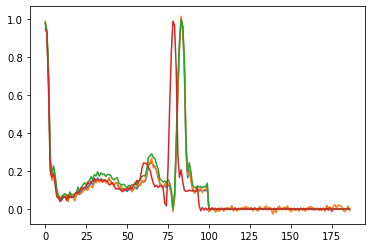

In [ ]:
plt.plot(X_train[0])
plt.plot(gaussian_noise(X_train[0]))
plt.plot(amplify(X_train[0]))
plt.plot(stretch(X_train[0]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((78798, 187), (78798,), (8756, 187), (8756,))

In [ ]:
tmp_X_train = X_train.copy()
tmp_y_train = y_train.copy()

X_train = []
y_train = []
for i in range(0, len(tmp_y_train)):
    augment_X = augment(tmp_X_train[i])
    augment_y = np.ones(shape=(augment_X.shape[0],), dtype=int)*tmp_y_train[i]

    X_train.extend(augment_X)
    y_train.extend(augment_y)
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((315192, 187), (315192,))

In [ ]:
X_train = X_train.reshape((-1, len(feat_cols_name), 1))
X_val = X_val.reshape((-1, len(feat_cols_name), 1))
X_test = X_test.reshape((-1, len(feat_cols_name), 1))

y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [ ]:
input_shape = X_train.shape[1:]
nb_classes = len(Classes_index.keys())
input_shape, nb_classes

((187, 1), 5)